Please submit an electronic version of your Python Jupyter notebook on NYU Brightspace. Remember that this assignment is to be done individually. Solutions will be posted a few days after the due date (on Feb 20th), so assignments submitted until that day will receive a late penalty, but no late assignments will be accepted after the solutions are posted.

Total points for this HW: 10

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10%)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3%)

Your answer here.
  - Interpretability is important when making predictions on urban data models. For example, classification and prediction of traffic data may require some subjective or accidental factors as a basis or split, and the prediction needs to be more intuitive and clear when used. The decision tree model can be better used in practice than the random forest method in these aspects. Therefore, in many cases decision tree models are better


b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3%)

Your answer here.

  - For urban health and safety issues such as urban air quality conditions or crimes, accuracy is crucial and interpretability is less important. The random forest algorithm has higher prediction accuracy than the decision tree model, so the random forest algorithm is better


c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4%)

Your answer here.

  - Decision tree model based on random forest: Use the random forest to get prediction by training decision tree model
  - Perform interpretable processing on each feature or several important features of the random forest, such as setting up PDP, etc.


###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been modified, so you may get a different tree than the one shown in the lecture notes.  (30%)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\ngood,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2%)

In [3]:
# your code here
most_common_MPG = df['MPG'].mode()[0]
most_common_MPG

'bad'

In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5%)

In [5]:
# your code here
variables = ['cylinders', 'weight']
ig = {}


for variable in variables:
    values = df[variable].unique()
    for value in values:
        subsetY = df[df[variable] == value]
        subsetN = df[df[variable] != value]
        
        goodY = subsetY[subsetY['MPG'] == 'good'].shape[0]
        badY = subsetY[subsetY['MPG'] == 'bad'].shape[0]
        goodN = subsetN[subsetN['MPG'] == 'good'].shape[0]
        badN = subsetN[subsetN['MPG'] == 'bad'].shape[0]
        
        ig[f"{variable} == {value}"] = InformationGain(goodY, badY, goodN, badN)

ig = sorted(ig.items(), key=lambda x: x[1], reverse=True)
ig

[('cylinders == 4', 0.4680577739061723),
 ('cylinders == 6', 0.1916312040067166),
 ('weight == light', 0.1916312040067166),
 ('weight == weighty', 0.1916312040067166),
 ('cylinders == 8', 0.15307795338969116),
 ('weight == medium', 0.0058021490143458365)]

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5%) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [6]:
# your code here
hp_values_sorted = sorted(df['HP'].unique())
hp_midpoints = [(hp_values_sorted[i] + hp_values_sorted[i+1]) / 2 for i in range(len(hp_values_sorted) - 1)]

hp_ig = {}

for midpoint in hp_midpoints:
    subsetY = df[df['HP'] <= midpoint]
    subsetN = df[df['HP'] > midpoint]
    
    goodY = subsetY[subsetY['MPG'] == 'good'].shape[0]
    badY = subsetY[subsetY['MPG'] == 'bad'].shape[0]
    goodN = subsetN[subsetN['MPG'] == 'good'].shape[0]
    badN = subsetN[subsetN['MPG'] == 'bad'].shape[0]
    
    hp_ig[f"HP <= {midpoint}"] = InformationGain(goodY, badY, goodN, badN)

hp_ig = sorted(hp_ig.items(), key=lambda x: x[1], reverse=True)
hp_ig

[('HP <= 93.5', 0.5567796494470395),
 ('HP <= 94.5', 0.4680577739061723),
 ('HP <= 92.5', 0.3248903838733558),
 ('HP <= 83.0', 0.30984030471640045),
 ('HP <= 97.5', 0.28129089923069267),
 ('HP <= 89.5', 0.2759267455941731),
 ('HP <= 78.0', 0.19350684337293433),
 ('HP <= 91.0', 0.1916312040067166),
 ('HP <= 105.0', 0.1916312040067166),
 ('HP <= 87.0', 0.16206546623874934),
 ('HP <= 124.5', 0.15307795338969116),
 ('HP <= 142.0', 0.1177436968907207),
 ('HP <= 70.0', 0.09139023062144994),
 ('HP <= 157.5', 0.08512362463476446),
 ('HP <= 172.5', 0.054824648581652015),
 ('HP <= 182.5', 0.026534328467343292)]

d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4%)

Your answer here.

  - The optimal binary split of the data is HP <= 93.5(part c) because of the highest information gain, the weight of data may require further partitioning. In addition, we would examine the purity of each node. If either node contains a mix of "good" and "bad" MPG values, it would require further partitioning.


e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6%)

In [7]:
# your code here
def decision_tree(df, depth=0, max_depth=2):
    if depth == max_depth or df['MPG'].nunique() == 1:
        return {'label': df['MPG'].mode()[0], 'depth': depth}
    
    split = {"feature": None, "value": None, "info_gain": -1}
    features = ['cylinders', 'HP', 'weight']
    for feature in features:
        unique_values = sorted(df[feature].unique()) if feature != 'HP' else hp_midpoints
        for value in unique_values:
            if feature == 'HP':
                subsetY = df[df['HP'] <= value]
                subsetN = df[df['HP'] > value]
            elif feature in ['cylinders', 'weight']:
                subsetY = df[df[feature] == value]
                subsetN = df[df[feature] != value]
            
            goodY = subsetY[subsetY['MPG'] == 'good'].shape[0]
            badY = subsetY[subsetY['MPG'] == 'bad'].shape[0]
            goodN = subsetN[subsetN['MPG'] == 'good'].shape[0]
            badN = subsetN[subsetN['MPG'] == 'bad'].shape[0]
            
            info_gain = InformationGain(goodY, badY, goodN, badN)
            if info_gain > split['info_gain']:
                split = {"feature": feature, "value": value, "info_gain": info_gain}
    
    if split['feature'] == 'HP':
        left = df[df['HP'] <= split['value']]
        right = df[df['HP'] > split['value']]
    elif split['feature'] in ['cylinders', 'weight']:
        left = df[df[split['feature']] == split['value']]
        right = df[df[split['feature']] != split['value']]
    
    left_child = decision_tree(left, depth + 1, max_depth)
    right_child = decision_tree(right, depth + 1, max_depth)
    
    return {
        'feature': split['feature'],
        'value': split['value'],
        'left': left_child,
        'right': right_child,
        'depth': depth
    }

Decision_Tree = decision_tree(df, max_depth=3)
Decision_Tree


{'feature': 'HP',
 'value': 93.5,
 'left': {'feature': 'cylinders',
  'value': 4,
  'left': {'label': 'good', 'depth': 2},
  'right': {'label': 'bad', 'depth': 2},
  'depth': 1},
 'right': {'label': 'bad', 'depth': 1},
 'depth': 0}

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4%)

Your answer here

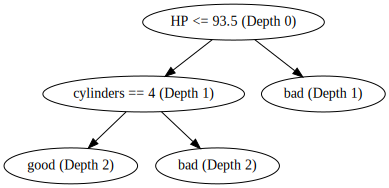

In [8]:
from graphviz import Digraph
import IPython.display as ipd

def plot_tree(tree):
    dot = Digraph()
    
    def nodes_edges(tree, parent=None, name='0'):

        if 'label' in tree:
            Label = f"{tree['label']} (Depth {tree['depth']})"
        else:
            if tree['feature'] == 'HP':
                Label = f"{tree['feature']} <= {tree['value']} (Depth {tree['depth']})"
            else:
                Label = f"{tree['feature']} == {tree['value']} (Depth {tree['depth']})"
        
        dot.node(name, Label)
        
        if parent is not None:
            dot.edge(parent, name)
        
        if 'left' in tree:
            nodes_edges(tree['left'], name, f"{name}0")
        if 'right' in tree:
            nodes_edges(tree['right'], name, f"{name}1")
    
    nodes_edges(tree)
    return dot

decision_tree_dot = plot_tree(Decision_Tree)

ipd.display(decision_tree_dot)

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4%)

MPG,cylinders,HP,weight

???,4,93,light : Good

???,6,113,medium : Bad

???,4,83,weighty : Good

???,6,70,weighty : Bad


### Question 3, Predicting burden of disease （40%)

In [9]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10%)

In [10]:
# your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'data' is loaded as described
# data = pd.read_csv("Burden of diarrheal illness by country.csv")

# Preparing the data
X = data.drop(['Country', 'BurdenOfDisease'], axis=1)
y = data['BurdenOfDisease']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trying different values of max_depth as the hyper-parameter
max_depths = range(1, 10)
accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Displaying accuracies for different depths
for depth, accuracy in zip(max_depths, accuracies):
    print(f"Max Depth: {depth}, Accuracy: {accuracy}")


Max Depth: 1, Accuracy: 0.2564102564102564
Max Depth: 2, Accuracy: 0.3333333333333333
Max Depth: 3, Accuracy: 0.5641025641025641
Max Depth: 4, Accuracy: 0.5641025641025641
Max Depth: 5, Accuracy: 0.48717948717948717
Max Depth: 6, Accuracy: 0.5897435897435898
Max Depth: 7, Accuracy: 0.5897435897435898
Max Depth: 8, Accuracy: 0.5897435897435898
Max Depth: 9, Accuracy: 0.5897435897435898


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10%)

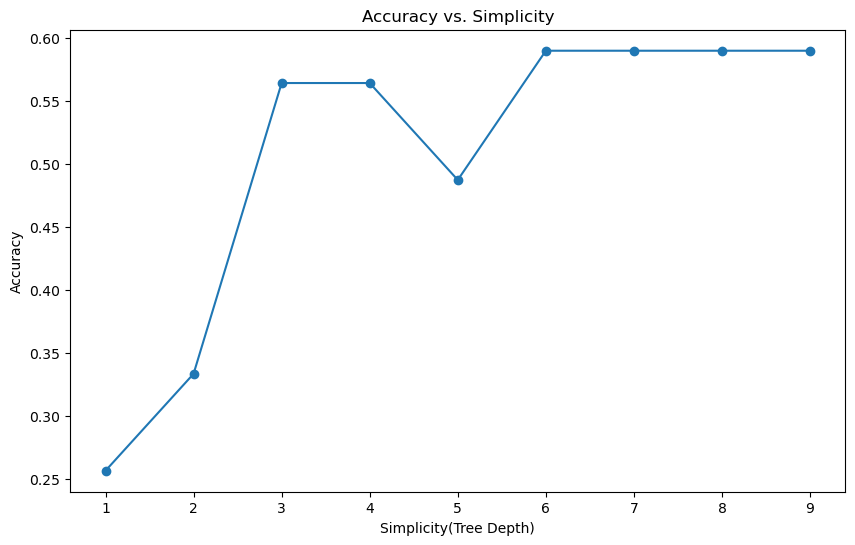

In [11]:
# your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.title('Accuracy vs. Simplicity')
plt.xlabel('Simplicity(Tree Depth)')
plt.ylabel('Accuracy')
plt.show()


c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10%)

In [12]:
# your code here
from sklearn.model_selection import GridSearchCV

param = {'max_depth': range(1, 10)}

gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=42), param, cv=5, scoring='accuracy')
gridsearch.fit(X_train, y_train)

depth = gridsearch.best_params_['max_depth']
estimator = gridsearch.best_estimator_
predictions = estimator.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Best Depth: {depth}, Out of Sample Accuracy: {accuracy}")


Best Depth: 8, Out of Sample Accuracy: 0.5897435897435898


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (10%)

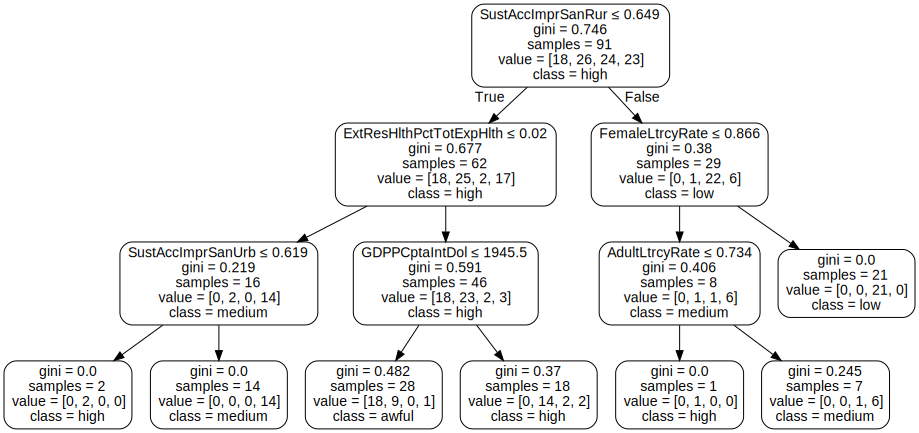

In [13]:
# your code here
from sklearn.tree import export_graphviz
import graphviz

simple_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_dt.fit(X_train, y_train)

dot_data = export_graphviz(simple_dt, out_file=None, 
                           feature_names=X.columns,class_names=simple_dt.classes_,
                           rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Question 4, Fit a random forest to the data from question 3 (20%)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10%)

In [14]:
# your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gridsearch_rf = GridSearchCV(RandomForestClassifier(random_state=42), param, cv=5, scoring='accuracy')
gridsearch_rf.fit(X_train, y_train)

best_rf = gridsearch_rf.best_estimator_
predictions_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)

print(f"Random Forest Out of Sample Accuracy: {accuracy_rf}")


Random Forest Out of Sample Accuracy: 0.6153846153846154


In [15]:
#Compared with the model in part 3c which accuracy is about 0.5897, this model has higher accuracy 0.6154 for out-of-sample data sets and 
#its forecast is significantly better.

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10%)

Your answer here. 

  - Decision trees have higher interpretability. They use tree structures to provide a structured decision-making process, and the classification process and results they output are very clear and concise. However, decision trees are prone to overfitting, resulting in suboptimal accuracy on unseen data.
  - Random forests improve accuracy by mitigating overfitting by aggregating predictions from multiple trees. However, this ensemble nature makes random forests more difficult to interpret than individual decision trees, but greatly improves their predictive power and accuracy.
  - The choice between these two models depends on the trade-off between interpretability and accuracy, with decision trees providing transparency and better interpretability and random forests providing enhanced predictive performance and higher accuracy.